<h3><b> Random Forest modelling to determine probability of Attrition </b</h3>

In [2]:
#Importing the required libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, RocCurveDisplay
import seaborn as sns
import matplotlib.pyplot as plt
import shap


IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html


In [3]:
#Importing the csv file ready for modelling
rfe_df = pd.read_csv('modelling.csv')

In [4]:
rfe_df.head(10)

,Unnamed: 0,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeID,...,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager,EnvironmentSatisfaction,JobSatisfaction,WorkLifeBalance,JobInvolvement,PerformanceRating,TotalWorkingHours
0,0,51,No,Travel_Rarely,Sales,6,2,Life Sciences,1,1,...,6,1,0,0,3,4,2,3,3,1711
1,1,31,Yes,Travel_Frequently,Research & Development,10,1,Life Sciences,1,2,...,3,5,1,4,3,2,4,2,4,1822
2,2,32,No,Travel_Frequently,Research & Development,17,4,Other,1,3,...,2,5,0,3,2,2,1,3,3,1697
3,3,38,No,Non-Travel,Research & Development,2,5,Life Sciences,1,4,...,5,8,7,5,4,4,3,2,3,1691
4,4,32,No,Travel_Rarely,Research & Development,10,1,Medical,1,5,...,2,6,0,4,4,1,3,3,3,1962
5,5,46,No,Travel_Rarely,Research & Development,8,3,Life Sciences,1,6,...,5,7,7,7,3,2,2,3,3,2559
6,6,28,Yes,Travel_Rarely,Research & Development,11,2,Medical,1,7,...,2,0,0,0,1,3,1,3,4,1606
7,7,29,No,Travel_Rarely,Research & Development,18,3,Life Sciences,1,8,...,2,0,0,0,1,2,3,3,4,1634
8,8,31,No,Travel_Rarely,Research & Development,1,3,Life Sciences,1,9,...,2,9,7,8,2,4,3,3,4,1664
9,9,25,No,Non-Travel,Research & Development,7,4,Medical,1,10,...,2,6,1,5,2,1,3,3,3,1657


In [5]:
#Dropping unnecessary columns
rfe_df = rfe_df.drop(columns={'Unnamed: 0', 'EmployeeCount', 'Over18', 'StandardHours'})

#Setting EmployeeID as the index for this dataframe since it won't be used for further analysis
rfe_df.set_index('EmployeeID', inplace=True)

rfe_df.head(10)

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,Gender,JobLevel,JobRole,...,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager,EnvironmentSatisfaction,JobSatisfaction,WorkLifeBalance,JobInvolvement,PerformanceRating,TotalWorkingHours
EmployeeID,,,,,,,,,,,,,,,,,,,,,
1,51,No,Travel_Rarely,Sales,6,2,Life Sciences,Female,1,Healthcare Representative,...,6,1,0,0,3,4,2,3,3,1711
2,31,Yes,Travel_Frequently,Research & Development,10,1,Life Sciences,Female,1,Research Scientist,...,3,5,1,4,3,2,4,2,4,1822
3,32,No,Travel_Frequently,Research & Development,17,4,Other,Male,4,Sales Executive,...,2,5,0,3,2,2,1,3,3,1697
4,38,No,Non-Travel,Research & Development,2,5,Life Sciences,Male,3,Human Resources,...,5,8,7,5,4,4,3,2,3,1691
5,32,No,Travel_Rarely,Research & Development,10,1,Medical,Male,1,Sales Executive,...,2,6,0,4,4,1,3,3,3,1962
6,46,No,Travel_Rarely,Research & Development,8,3,Life Sciences,Female,4,Research Director,...,5,7,7,7,3,2,2,3,3,2559
7,28,Yes,Travel_Rarely,Research & Development,11,2,Medical,Male,2,Sales Executive,...,2,0,0,0,1,3,1,3,4,1606
8,29,No,Travel_Rarely,Research & Development,18,3,Life Sciences,Male,2,Sales Executive,...,2,0,0,0,1,2,3,3,4,1634
9,31,No,Travel_Rarely,Research & Development,1,3,Life Sciences,Male,3,Laboratory Technician,...,2,9,7,8,2,4,3,3,4,1664


In [6]:
rfe_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4410 entries, 1 to 4410
Data columns (total 26 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Age                      4410 non-null   int64 
 1   Attrition                4410 non-null   object
 2   BusinessTravel           4410 non-null   object
 3   Department               4410 non-null   object
 4   DistanceFromHome         4410 non-null   int64 
 5   Education                4410 non-null   int64 
 6   EducationField           4410 non-null   object
 7   Gender                   4410 non-null   object
 8   JobLevel                 4410 non-null   int64 
 9   JobRole                  4410 non-null   object
 10  MaritalStatus            4410 non-null   object
 11  MonthlyIncome            4410 non-null   int64 
 12  NumCompaniesWorked       4410 non-null   int64 
 13  PercentSalaryHike        4410 non-null   int64 
 14  StockOptionLevel         4410 non-null   int6

<h4><b> Data Preprocessing and Model Training </b></h4>

* In this step, the RandomForest model will be trained using features and the target variable
* Standard scaling will be applied to normalize the numerical features in the dataset
* One-Hot Encoding will be done on categorical columns to convert them into numerical format

In [7]:
# Separating the features and the target variable
X = rfe_df.drop(columns='Attrition')
y = rfe_df['Attrition']

# Identifying the numerical and categorical columns
numerical_cols = X.select_dtypes(include=['int64']).columns.tolist()
categorical_cols = X.select_dtypes(include=['object']).columns.tolist()

In [8]:
# Preprocessing pipeline for numerical and categorical data
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_cols),
        ('cat', OneHotEncoder(), categorical_cols)
    ])

# Splitting data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

# Creating a RandomForestClassifier with class weighting to handle imbalances in the data
rf_model = RandomForestClassifier(class_weight='balanced', random_state=42)

# Creating a pipeline that includes preprocessing and the RandomForestClassifier
rf_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', rf_model)
])

In [9]:
# Fitting the Random Forest model
rf_pipeline.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['Age', 'DistanceFromHome',
                                                   'Education', 'JobLevel',
                                                   'MonthlyIncome',
                                                   'NumCompaniesWorked',
                                                   'PercentSalaryHike',
                                                   'StockOptionLevel',
                                                   'TotalWorkingYears',
                                                   'TrainingTimesLastYear',
                                                   'YearsAtCompany',
                                                   'YearsSinceLastPromotion',
                                                   'YearsWithCurrManager',
                                                   'EnvironmentSatisfaction',
                                                   'JobSatisfaction',
                                                   'WorkLifeBalance',
                                                   'JobInvolvement',
                                                   'PerformanceRating',
                                                   'TotalWorkingHours']),
                                                 ('cat', OneHotEncoder(),
                                                  ['BusinessTravel',
                                                   'Department',
                                                   'EducationField', 'Gender',
                                                   'JobRole',
                                                   'MaritalStatus'])])),
                ('classifier',
                 RandomForestClassifier(class_weight='balanced',
                                        random_state=42))])

<h4><b> Prediction and Model Evaluation </b></h4>

* Here, the target variable will be predicted based on the test data set samples
* The model will be evaluated based on various metrics such as:
    * ROC & AUC
    * Confusion matrix
    * Classification Report

In [10]:
# Making predictions on the test set
y_pred = rf_pipeline.predict(X_test)
y_prob = rf_pipeline.predict_proba(X_test)[:, 1]

In [11]:
# Evaluating the model
classification_rep = classification_report(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_prob)

print("Classification report for the trained model:\n",classification_rep)

Classification report for the trained model:
               precision    recall  f1-score   support

          No       0.96      1.00      0.98      1486
         Yes       1.00      0.77      0.87       278

    accuracy                           0.96      1764
   macro avg       0.98      0.89      0.93      1764
weighted avg       0.97      0.96      0.96      1764



In [12]:
print("The ROC-AUC value for this model is as follows:",roc_auc)

The ROC-AUC value for this model is as follows: 0.9901647995197381


<B>The ROC-AUC value denotes that the model has outstanding discrimination and classifies the target variable very accurately</B>

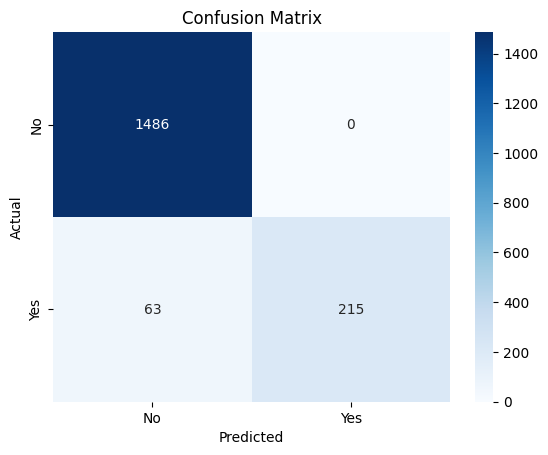

In [13]:
#Visualization of the Confusion matrix
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['No', 'Yes'], yticklabels=['No', 'Yes'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

<h4><b> Probability of attrition and feature importance </b></h4>

In [14]:
#Selecting random samples from the original dataset
random_samples = rfe_df.sample(n=20, random_state=42)

# Separating the features and the target variable
X_rand = random_samples.drop(columns='Attrition')
y_rand = random_samples['Attrition']

# Identifying the numerical and categorical columns
numerical_cols = X_rand.select_dtypes(include=['int64']).columns.tolist()
categorical_cols = X_rand.select_dtypes(include=['object']).columns.tolist()



In [15]:
#Preprocessing the samples using the pre-processors defined in the above code
X_samples_preprocessed = preprocessor.transform(X_rand)

In [16]:
# Calculating attrition probabilities
attrition_probabilities = rf_pipeline.named_steps['classifier'].predict_proba(X_samples_preprocessed)[:, 1]

# Extracting feature importances from the RandomForest model
feature_importances = rf_pipeline.named_steps['classifier'].feature_importances_

# Extracting the names of the features
feature_names = numerical_cols + list(preprocessor.named_transformers_['cat'].get_feature_names_out(categorical_cols))


In [16]:
# Creating a DataFrame to display feature importances
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

In [20]:
# Displaying the results
results = pd.DataFrame(X_rand)
results['Attrition Probability'] = attrition_probabilities
results['Actual Attrition'] = y_rand.values
print("Selected Samples and Their Attrition Probabilities:\n")
results

Selected Samples and Their Attrition Probabilities:



,Age,BusinessTravel,Department,DistanceFromHome,Education,EducationField,Gender,JobLevel,JobRole,MaritalStatus,...,YearsSinceLastPromotion,YearsWithCurrManager,EnvironmentSatisfaction,JobSatisfaction,WorkLifeBalance,JobInvolvement,PerformanceRating,TotalWorkingHours,Attrition Probability,Actual Attrition
EmployeeID,,,,,,,,,,,,,,,,,,,,,
1414,49,Non-Travel,Research & Development,23,1,Other,Female,2,Sales Executive,Divorced,...,1,7,4,4,3,3,3,2360,0.03,No
3353,27,Travel_Rarely,Research & Development,1,3,Medical,Male,1,Research Scientist,Single,...,0,0,2,3,3,3,3,1812,0.30,No
3971,35,Non-Travel,Sales,10,1,Life Sciences,Female,2,Research Director,Divorced,...,1,7,2,4,3,3,3,1631,0.00,No
3630,52,Travel_Rarely,Research & Development,3,2,Technical Degree,Male,3,Laboratory Technician,Single,...,7,7,2,2,2,3,3,2341,0.79,Yes
145,30,Travel_Rarely,Sales,5,4,Medical,Female,2,Manufacturing Director,Single,...,4,4,2,3,3,3,3,1859,0.11,No
1747,53,Travel_Rarely,Research & Development,7,1,Life Sciences,Male,2,Laboratory Technician,Married,...,1,3,3,3,3,3,3,1587,0.00,No
2155,36,Travel_Rarely,Sales,1,3,Marketing,Male,2,Sales Executive,Married,...,1,7,4,3,3,2,3,1557,0.00,No
4325,36,Travel_Frequently,Sales,25,3,Marketing,Female,2,Research Director,Single,...,7,2,4,2,2,3,4,1748,0.01,No
4408,25,Travel_Rarely,Research & Development,25,2,Life Sciences,Male,2,Sales Executive,Married,...,1,2,1,3,3,3,4,1780,0.00,No


<h4><b> SHAP Visualizations </b></h4>

* In this section, I've used SHAP (SHapley Additive exPlanations) visualizations to visualize the feature importance and thier impact on the predicted model
* The features at the top have the most significant impact on the model predictions
* Positive SHAP values indicates that the feature increases the probability of attrition and negative SHAP values denotes decrease in the attrition probability rate


SHAP Values for Selected Samples:
                  Age  DistanceFromHome  Education  JobLevel  MonthlyIncome  \
EmployeeID                                                                   
1414       -0.062513         -0.022028  -0.004438 -0.006540      -0.022401   
3353        0.033961         -0.021209  -0.002798 -0.028407      -0.085198   
3971       -0.041627         -0.008578  -0.007060 -0.000630      -0.017510   
3630       -0.048229          0.000340   0.000692 -0.002104      -0.014436   
145         0.027594         -0.013055  -0.023161 -0.002733      -0.014825   
1747       -0.054453         -0.009001  -0.007734 -0.001370      -0.018866   
2155       -0.048848         -0.011520  -0.005879 -0.001556      -0.021060   
4325       -0.073309         -0.044075  -0.009023 -0.006224      -0.010692   
4408        0.015764         -0.042315  -0.007031 -0.001348      -0.018734   
2579       -0.055751         -0.011842  -0.008796  0.000919      -0.026277   
3904       -0.054404         

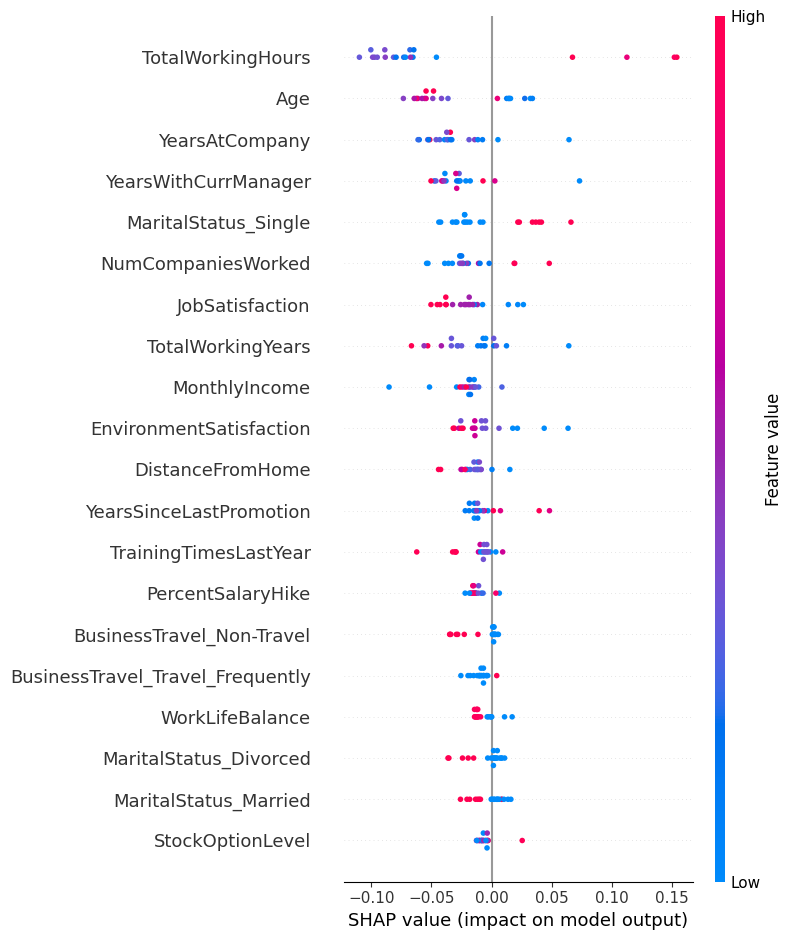

In [21]:
# Initializing the SHAP explainer with the RandomForest model
explainer = shap.TreeExplainer(rf_pipeline.named_steps['classifier'])

# Computing SHAP values for the samples
shap_values = explainer.shap_values(X_samples_preprocessed)

# Converting SHAP values to a DataFrame for better interpretation
shap_values_df = pd.DataFrame(shap_values[1], columns=feature_names, index=X_rand.index)

# Displaying the SHAP values for the selected samples
print("SHAP Values for Selected Samples:\n", shap_values_df)

# Plotting summary of SHAP values for better visualization
shap.summary_plot(shap_values[1], X_samples_preprocessed, feature_names=feature_names)

<h4><b> Summary of Random Forest model developed for probability of Attrition </b></h4>
<b> Red dots: Higher feature value ; Blue dots: Lower feature value </b>

* <b>TotalWorkingHours:</b> The red dots scattered on the positive x-axis indicate that higher working hours for employee lead to increase in attrition rate. Whereas, blue and purple dots on the negative x-axis indicate that employees having lesser total working hours are less likely to leave the organization
* <b>YearsAtCompany:</b> The blue dots on the positive x-axis indicate that employees having worked less years at the company are more likely to leave, while more experienced employees are having lower attrition rates
* <b>MartialStatus_Single:</b> This visualization implies that single employees are more likely to leave the organization than married or divorced employees
* <b>JobSatisfaction & EnvironmentSatisfaction:</b> For both of these features, higher the feature value, lesser is the attrition rate. This implies that the employees who are satisfied with their jobs and the workplace environment are less likely to leave the organization

Similarly, other variables can be summarized from the above graph